# Reto: Entregable #1
### Limpieza y procesamiento de datos

| Integrantes        | Matricula            |
|---------------|---------------|
| Ana Lucía Cárdenas Pérez      | A01284090          |
| Elías Garza Valdés      | A01284041          |
| Diego Elián Rodríguez Cantú      | A00829925          |
| José Edmundo Romo Castillo           | A01197772           |


In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Lectura y revisión de datos

In [3]:
train = pd.read_csv("../Data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La base de datos contiene la información de los pasajeros del Titanic de 1912, embarcación que terminó siendo hundida por su colisión con un iceberg. En la base se tienen diversos datos entre ellos la clasificación de si este viajero sobrevivió al accidente o falleció. Entre las demás variables disponibles se encuentran:

1. **PassengerId** [int]: Es un identificador único asignado a cada pasajero.

2. **Survived** [bool]: Indica si el pasajero sobrevivió o no al naufragio. Un valor de 0 significa que no sobrevivió, y un valor de 1 significa que sí sobrevivió.

3. **Pclass (Passenger Class)** [int]: Representa la clase en la que el pasajero viajaba. Puede tener los valores 1 (primera clase), 2 (segunda clase) o 3 (tercera clase).

4. **Name** [str]: El nombre del pasajero.

5. **Sex** [str]: El género del pasajero, que puede ser 'male' (hombre) o 'female' (mujer).

6. **Age** [float]: La edad del pasajero en años. Algunas edades pueden estar representadas como fracciones si los pasajeros eran bebés.

7. **SibSp (Siblings/Spouses Aboard)** [int]: El número de hermanos o cónyuges que el pasajero tenía a bordo.

8. **Parch (Parents/Children Aboard)** [int]: El número de padres o hijos que el pasajero tenía a bordo.

9. **Ticket** [str]: El número de la boletería del pasajero.

10. **Fare** [float]: El precio del boleto que el pasajero pagó.

11. **Cabin** [str]: El número de cabina en la que el pasajero estaba alojado. Algunos valores pueden estar ausentes debido a la falta de registros.

12. **Embarked** [char]: El puerto donde el pasajero embarcó. Puede tener los valores 'C' (Cherbourg), 'Q' (Queenstown) o 'S' (Southampton).

Cabe mencionar que además de estas columnas principales, puede haber otras columnas secundarias en la base de datos con información adicional, pero estas son las principales que se utilizan comúnmente en análisis y modelado predictivo.

### Limpieza y transformación de variables

Para la exploración inicial se revisará los tipos de datos y sus valores faltantes.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


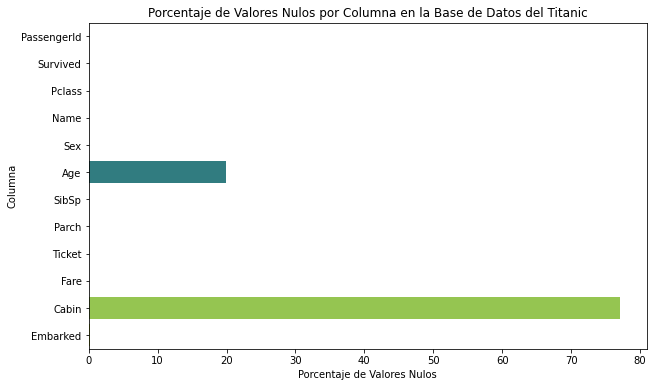

In [15]:
null_percentages = (train.isnull().sum() / len(train)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentages.values, y=null_percentages.index, palette='viridis')
plt.xlabel('Porcentaje de Valores Nulos')
plt.ylabel('Columna')
plt.title('Porcentaje de Valores Nulos por Columna en la Base de Datos del Titanic')
plt.show()